<a href="https://colab.research.google.com/github/gustavorenner/Projetos/blob/main/Trabalho_final_redes_complexas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Este código tem como objetivo a análise de redes complexas, focando em redes sociais. Ele utiliza a biblioteca NetworkX em Python para realizar a análise.

O código realiza as seguintes etapas principais:

1. Carrega dados de três redes sociais diferentes a partir de arquivos CSV. Esses dados representam as conexões entre indivíduos dentro de cada rede.

2. Constrói grafos representando cada rede social, onde os nós são os indivíduos e as arestas são as conexões entre eles.

3. Calcula diversas métricas de centralidade para cada grafo, como centralidade de grau, de intermediação e de autovetor. Essas métricas ajudam a identificar os indivíduos mais importantes ou influentes dentro da rede.

4. Gera gráficos da distribuição de graus e da distribuição de caminhos mínimos para cada rede. Esses gráficos fornecem uma visão geral da estrutura e das propriedades da rede, como a conectividade e o comprimento do caminho entre os indivíduos.

Em resumo, o código busca analisar a estrutura e as propriedades de diferentes redes sociais através do cálculo de métricas de centralidade e da visualização de distribuições. O objetivo é compreender as relações entre os indivíduos dentro de cada rede e identificar os nós mais importantes.


In [2]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Defina a variável 'nomes_colunas'
nomes_colunas = ["Origem", "Destino"]

In [4]:
# Função para calcular métricas de centralidade
def calcular_centralidade_basica(G):
    centralidades = {
        'Degree Centrality': nx.degree_centrality(G),
        'Closeness Centrality': nx.closeness_centrality(G),
        'Betweenness Centrality': nx.betweenness_centrality(G),
        'Eigenvector Centrality': nx.eigenvector_centrality(G.to_undirected()),
        'Pagerank': nx.pagerank(G),
        'Hubs': nx.hits(G)[0],
        'Authorities': nx.hits(G)[1]
    }
    return centralidades

In [5]:
# Função para calcular as 10 métricas distintas adicionais
def calcular_metricas_adicionais(G):
    centralidades = calcular_centralidade_basica(G)
    centralidades['Clustering Coefficient'] = nx.clustering(G)
    centralidades['Assortativity'] = nx.degree_assortativity_coefficient(G)
    centralidades['Transitivity'] = nx.transitivity(G)
    centralidades['Weighted Betweenness'] = nx.betweenness_centrality(G, weight='weight')
    centralidades['Weighted Eigenvector'] = nx.eigenvector_centrality(G, weight='weight')
    return centralidades

In [6]:
def calcular_e_mostrar_resultados(G, nome_rede):
    num_metricas_basica = 7
    centralidades_basica = calcular_centralidade_basica(G)
    dados_basica = []

    for pessoa in G.nodes():
        linha = [pessoa]
        metricas = [centralidades_basica[metrica][pessoa] for metrica in centralidades_basica]
        soma_ponderada = np.sum([k / num_metricas_basica for k in metricas])
        linha.append(soma_ponderada)
        linha.extend(metricas)
        dados_basica.append(linha)

    df_resultados_basica = pd.DataFrame(
        dados_basica, columns=['Personagem', 'Geral'] + list(centralidades_basica.keys())
    ).sort_values(['Geral'], ascending=False)

    print(f"Resultados para as 7 primeiras métricas em {nome_rede}:")
    print(df_resultados_basica.head(5))  # Mostra os 5 principais nós
    print("\n")


    # Calcular e mostrar as 10 métricas distintas adicionais
    centralidades_adicionais = calcular_metricas_adicionais(G)
    dados_adicionais = []

    for personagem in G.nodes():
        linha = [personagem]
        metricas = [centralidades_adicionais[metrica][personagem] for metrica in centralidades_adicionais]
        dados_adicionais.append(metricas)

    df_resultados_adicionais = pd.DataFrame(
        dados_adicionais, columns=list(centralidades_adicionais.keys())
    )

    print(f"Resultados para as 10 métricas adicionais em {nome_rede}:")
    print(df_resultados_adicionais.head(5))  # Mostra os 5 principais nós
    print("\n")

In [11]:
def calcular_e_mostrar_resultados(G, nome_rede):


    # Calcular e mostrar as 10 métricas distintas adicionais
    centralidades_adicionais = calcular_metricas_adicionais(G)
    dados_adicionais = []

    for personagem in G.nodes():
        linha = [personagem]
        # Correção: Acessar os valores das métricas usando o nome da métrica e o nó atual
        metricas = [centralidades_adicionais[metrica][personagem]
                    if metrica in ['Degree Centrality', 'Closeness Centrality', 'Betweenness Centrality',
                                   'Eigenvector Centrality', 'Pagerank', 'Hubs', 'Authorities',
                                   'Weighted Betweenness', 'Weighted Eigenvector']
                    else centralidades_adicionais[metrica]  # Para métricas globais como Clustering Coefficient
                    for metrica in centralidades_adicionais]
        dados_adicionais.append(linha + metricas)  # Adicionar 'linha' de volta

    df_resultados_adicionais = pd.DataFrame(
        dados_adicionais, columns=['Personagem'] + list(centralidades_adicionais.keys())
    )

    print(f"Resultados para as 10 métricas adicionais em {nome_rede}:")
    print(df_resultados_adicionais.head(5))  # Mostra os 5 principais nós
    print("\n")

In [15]:
def plot_grafos(G1, G2, G3):

  # Define o layout dos subplots
  fig, axs = plt.subplots(1, 3, figsize=(15, 5))

  # Plota o primeiro grafo
  axs[0].set_title("Grafo G1")
  nx.draw(G1, with_labels=True, node_size=500, node_color="skyblue", ax=axs[0])

  # Plota o segundo grafo
  axs[1].set_title("Grafo G2")
  nx.draw(G2, with_labels=True, node_size=500, node_color="lightgreen", ax=axs[1])

  # Plota o terceiro grafo
  axs[2].set_title("Grafo G3")
  nx.draw(G3, with_labels=True, node_size=500, node_color="lightcoral", ax=axs[2])

  # Ajusta o layout e exibe os gráficos
  plt.tight_layout()
  plt.show()

In [7]:
# Plotar distribuição de graus e distribuição de caminhos mínimos
def plot_degree_distribution(G, nome_rede):
    degree_sequence = [d for n, d in G.degree()]
    plt.hist(degree_sequence, bins=30, alpha=0.7)
    plt.title(f'Distribuição de Graus em {nome_rede}')
    plt.xlabel('Grau')
    plt.ylabel('Número de Nós')
    plt.show()

def plot_shortest_path_distribution(G, nome_rede):
    shortest_paths = []
    for source in G.nodes():
        for target in G.nodes():
            if source != target:
                try:
                    shortest_path = nx.shortest_path_length(G, source=source, target=target)
                    shortest_paths.append(shortest_path)
                except nx.NetworkXNoPath:
                    pass
    plt.hist(shortest_paths, bins=20, alpha=0.7)
    plt.title(f'Distribuição de Caminhos Mínimos em {nome_rede}')
    plt.xlabel('Comprimento do Caminho Mínimo')
    plt.ylabel('Número de Pares de Nós')
    plt.show()

In [9]:
# Carregar os dados das redes
df1 = pd.read_csv("https://raw.githubusercontent.com/gustavorenner/Redes_complexas/main/socfb-Caltech36.csv", delimiter="\s+", header=None, skiprows=2, names=nomes_colunas)
df2 = pd.read_csv("https://raw.githubusercontent.com/gustavorenner/Redes_complexas/main/socfb-Haverford76.csv", delimiter="\s+", header=None, skiprows=2, names=nomes_colunas)
df3 = pd.read_csv("https://raw.githubusercontent.com/gustavorenner/Redes_complexas/main/socfb-Reed98.csv", delimiter="\s+", header=None, skiprows=2, names=nomes_colunas)

In [10]:
# Criar os grafos
G1 = nx.Graph()
for _, row in df1.iterrows():
    G1.add_edge(row['Origem'], row['Destino'])

G2 = nx.Graph()
for _, row in df2.iterrows():
    G2.add_edge(row['Origem'], row['Destino'])

G3 = nx.Graph()
for _, row in df3.iterrows():
    G3.add_edge(row['Origem'], row['Destino'])

In [12]:
# Calcular e mostrar os resultados para cada rede
calcular_e_mostrar_resultados(G1, "G1")
calcular_e_mostrar_resultados(G2, "G2")
calcular_e_mostrar_resultados(G3, "G3")

Resultados para as 10 métricas adicionais em G1:
   Personagem  Degree Centrality  Closeness Centrality  \
0           5           0.105469              0.478467   
1           1           0.161458              0.507445   
2          31           0.125000              0.485241   
3          36           0.105469              0.481215   
4          39           0.076823              0.469529   

   Betweenness Centrality  Eigenvector Centrality  Pagerank      Hubs  \
0                0.001447                0.064132  0.002045  0.003038   
1                0.005298                0.090080  0.003096  0.004267   
2                0.001763                0.069801  0.002368  0.003306   
3                0.002205                0.053852  0.002146  0.002551   
4                0.001443                0.039667  0.001666  0.001879   

   Authorities                             Clustering Coefficient  \
0     0.003038  {5: 0.35185185185185186, 1: 0.2605559926567007...   
1     0.004267  {5: 0.351

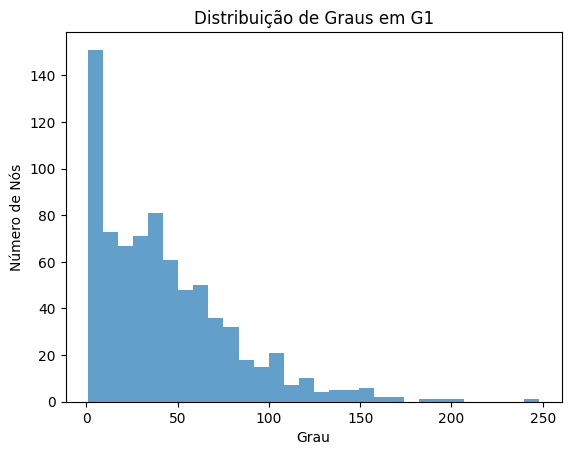

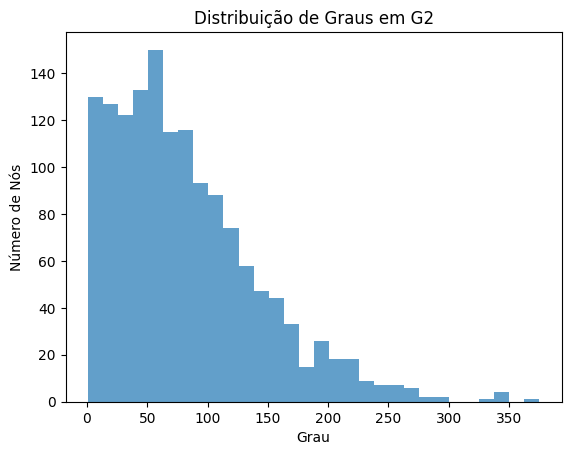

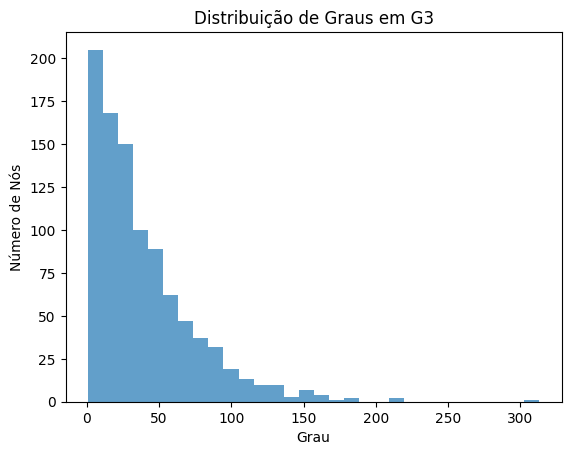

In [13]:
plot_degree_distribution(G1, "G1")
plot_degree_distribution(G2, "G2")
plot_degree_distribution(G3, "G3")

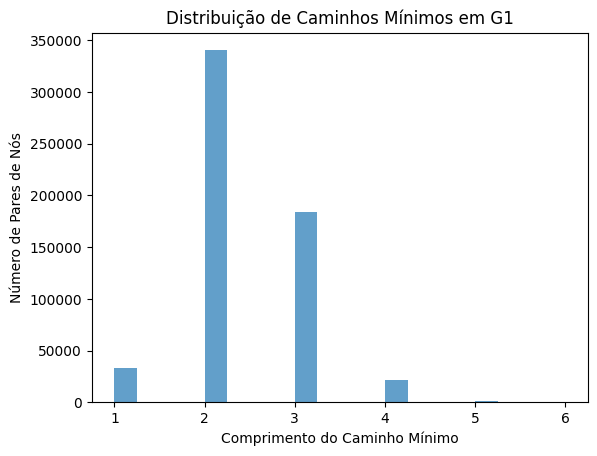

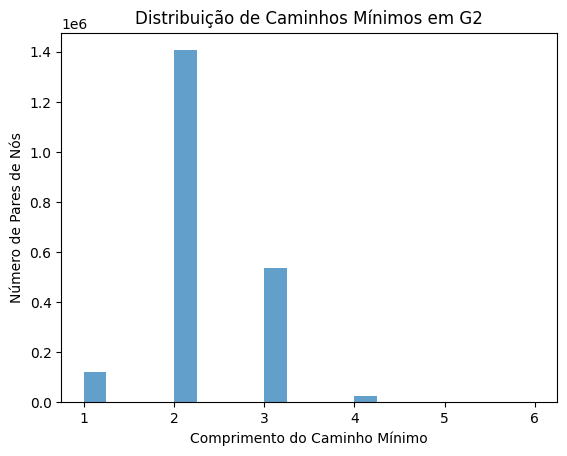

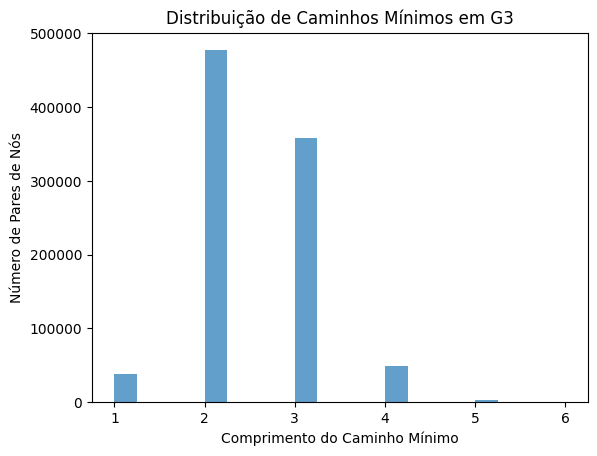

In [14]:
plot_shortest_path_distribution(G1, "G1")
plot_shortest_path_distribution(G2, "G2")
plot_shortest_path_distribution(G3, "G3")

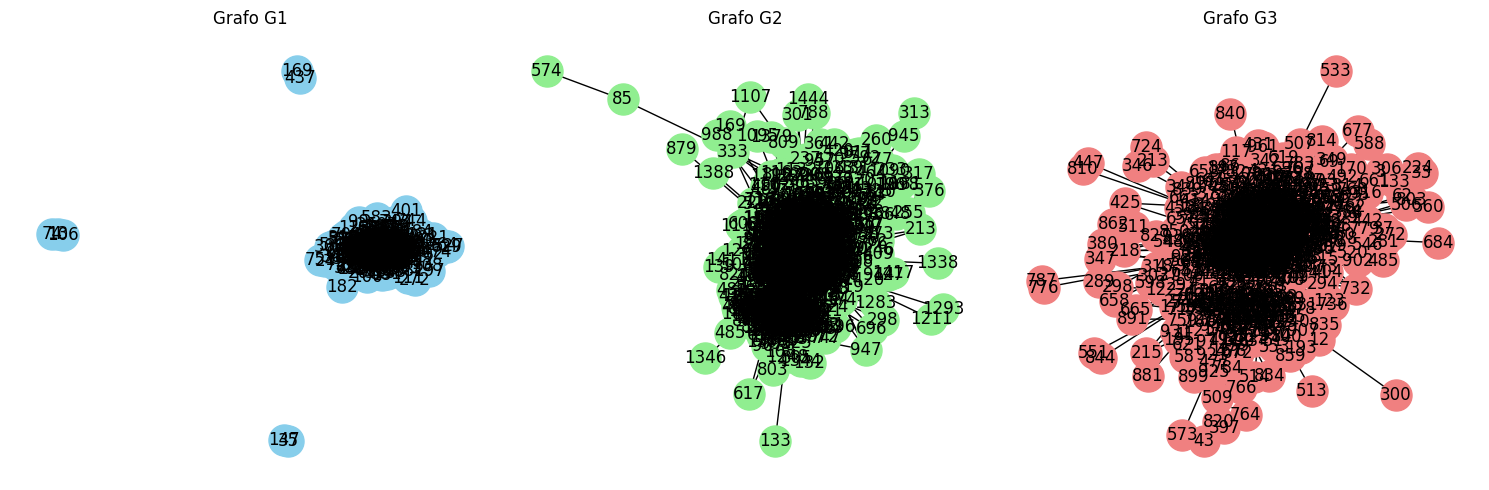

In [17]:
# Chama a função para plotar os grafos G1, G2 e G3
plot_grafos(G1, G2, G3)
